In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib notebook

## LES Quality Contour

1 1 1 1
422 781 98 3
100 3
101 16
115 1
75000 1400000 2000000 [150.]


<IPython.core.display.Javascript object>


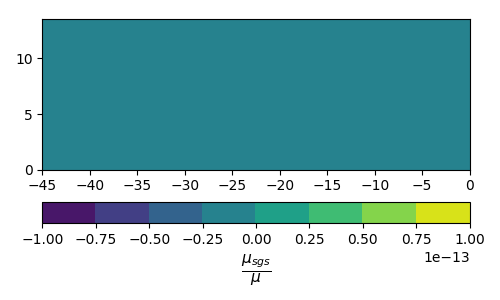

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [11]:
time = "280-320"

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/STAT_cont_m48_t250-400.bin"]

for ii in range(len(wdir)):
    f = open(wdir[ii],"rb")

    ### Reading the header of the STAT File
    val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
    print val, prec, ib, nb
    nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
    print nxp, nyp, nzp, ngp
        
    for i in range(1,ngp+1):
        gid, nvar = np.fromfile(f,dtype='int32',count=2)
        print gid, nvar
    nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
    tinterval = np.fromfile(f,dtype='float32',count=1)
    print nsamps, tstart, tend, tinterval


    ### Reading in the data now
    coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
    skipindex = 5
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    mu = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    skipindex = 10
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    musgs = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    f.close()
    
### Getting ready to plot this Shizz!
r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
z = coords[:,:,:,0]

plt.figure(figsize=(5,3))
cba = plt.contourf(-1*r[:,:,nzp/2],z[:,:,nzp/2],(musgs/mu)[:,:,nzp/2])
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$\frac{\mu_{sgs}}{\mu}$',rotation=0,fontsize=16)
plt.tight_layout()
#plt.savefig('figures_new/Re20k_t'+time+'_U.pdf')

## Total Time Interval

1 1 1 1
422 781 98 3
100 3
101 16
115 1
75000 1400000 2000000 [150.]


<IPython.core.display.Javascript object>


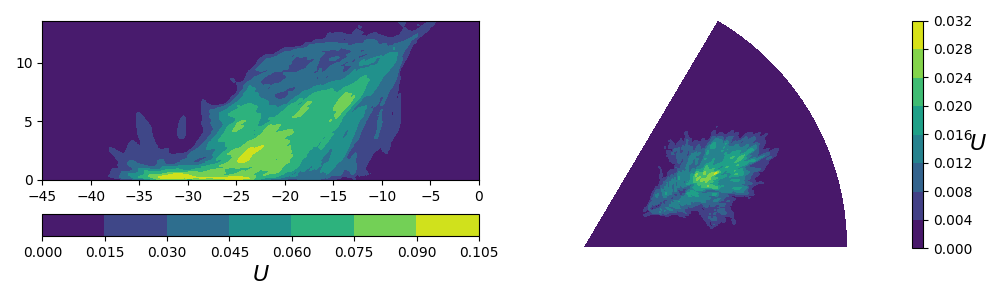

In [3]:
time = "240-400"

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/STAT_cont_m48_t250-400.bin"]

for ii in range(len(wdir)):
    f = open(wdir[ii],"rb")

    ### Reading the header of the STAT File
    val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
    print val, prec, ib, nb
    nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
    print nxp, nyp, nzp, ngp
        
    for i in range(1,ngp+1):
        gid, nvar = np.fromfile(f,dtype='int32',count=2)
        print gid, nvar
    nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
    tinterval = np.fromfile(f,dtype='float32',count=1)
    print nsamps, tstart, tend, tinterval


    ### Reading in the data now
    coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
    rho = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    uz = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    ur = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    skipindex = 12
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    uth = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    f.close()
    
### Getting ready to plot this Shizz!
u = np.sqrt((uz)**2 + (ur)**2 + (uth)**2)
r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
z = coords[:,:,:,0]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
cba = plt.contourf(-1*r[:,:,nzp/2],z[:,:,nzp/2],u[:,:,nzp/2])
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$U$',rotation=0,fontsize=16)
plt.tight_layout()

z_c = coords[1,:,:,2]; y_c = coords[1,:,:,1]
plt.subplot(1,2,2)
cba = plt.contourf(z_c, y_c,u[1,:,:])
clb = plt.colorbar(cba)
clb.set_label(r'$U$',rotation=0,fontsize=16)
#plt.annotate("(f)",xy=(0,35))
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.savefig('figures_new/Re20k_t'+time+'_U.pdf')

1 1 1 1
422 781 98 3
100 3
101 16
115 1
75000 1400000 2000000 [150.]


<IPython.core.display.Javascript object>


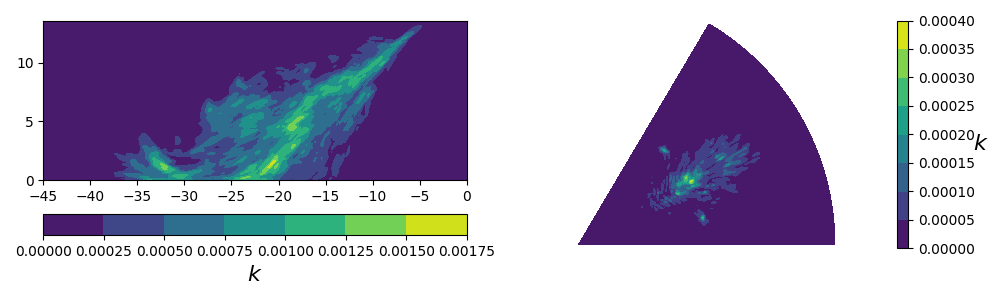

In [5]:
%matplotlib notebook
time = "240-400"

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/STAT_cont_m48_t250-400.bin"]

for ii in range(len(wdir)):
    f = open(wdir[ii],"rb")

    ### Reading the header of the STAT File
    val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
    print val, prec, ib, nb
    nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
    print nxp, nyp, nzp, ngp
        
    for i in range(1,ngp+1):
        gid, nvar = np.fromfile(f,dtype='int32',count=2)
        print gid, nvar
    nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
    tinterval = np.fromfile(f,dtype='float32',count=1)
    print nsamps, tstart, tend, tinterval


    ### Reading in the data now
    coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
    skipindex = 9
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    t11 = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    skipindex = 1
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    t22 = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    t33 = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    f.close()
    
### Getting ready to plot this Shizz!
tke = -0.5*(t11 + t22+ t33)
r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
z = coords[:,:,:,0]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
cba = plt.contourf(-1*r[:,:,nzp/2],z[:,:,nzp/2],tke[:,:,nzp/2])#,levels=np.linspace(0,0.0105,9))
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$k$',rotation=0,fontsize=16)
plt.tight_layout()

z_c = coords[1,:,:,2]; y_c = coords[1,:,:,1]
plt.subplot(1,2,2)
cba = plt.contourf(z_c, y_c,tke[1,:,:])#,levels=np.linspace(0,0.0004,9))
clb = plt.colorbar(cba)
clb.set_label(r'$k$',rotation=0,fontsize=16)
#plt.annotate("(f)",xy=(0,35))
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.savefig('figures_new/Re20k_t'+time+'_k.pdf')

## Plotting the velocity profiles in real coordinates

1 1 1 1
422 781 98 3
100 3
101 16
115 1
75000 1400000 2000000 [150.]


<IPython.core.display.Javascript object>


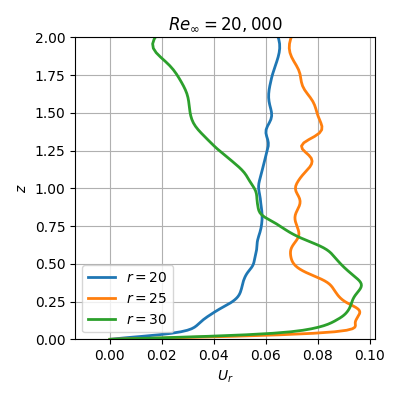

In [3]:
%matplotlib notebook
time = "240-400"

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/STAT_cont_m48_t250-400.bin"]

for ii in range(len(wdir)):
    f = open(wdir[ii],"rb")

    ### Reading the header of the STAT File
    val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
    print val, prec, ib, nb
    nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
    print nxp, nyp, nzp, ngp
        
    for i in range(1,ngp+1):
        gid, nvar = np.fromfile(f,dtype='int32',count=2)
        print gid, nvar
    nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
    tinterval = np.fromfile(f,dtype='float32',count=1)
    print nsamps, tstart, tend, tinterval


    ### Reading in the data now
    coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
    rho = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    uz = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    ur = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    skipindex = 2
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    mu = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    skipindex = 9
    f.seek(skipindex*nxp*nyp*nzp*4,1)
    uth = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
    f.close()
    
### Getting ready to plot this Shizz!
u = np.sqrt((uz)**2 + (ur)**2 + (uth)**2)
r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
z = coords[:,:,:,0]

indices = [638, 678, 707]
pos = [20, 25, 30]
plt.figure(figsize=(4,4))
plt.title(r"$Re_\infty = 20,000$")
for ll in range(len(indices)):
    plt.plot(ur[:,indices[ll],nzp/2],z[:,indices[ll],nzp/2],linewidth=2,label = r"$r = $"+str(pos[ll]))
plt.grid(True)
plt.xlabel(r"$U_r$")
plt.ylabel(r"$z$")
plt.ylim(0,2)
plt.legend(loc='best')
plt.tight_layout()

plt.show()
#plt.savefig('figures_new/Re10k_t'+time+'_U.pdf')

## BL Spreading Angle

<IPython.core.display.Javascript object>


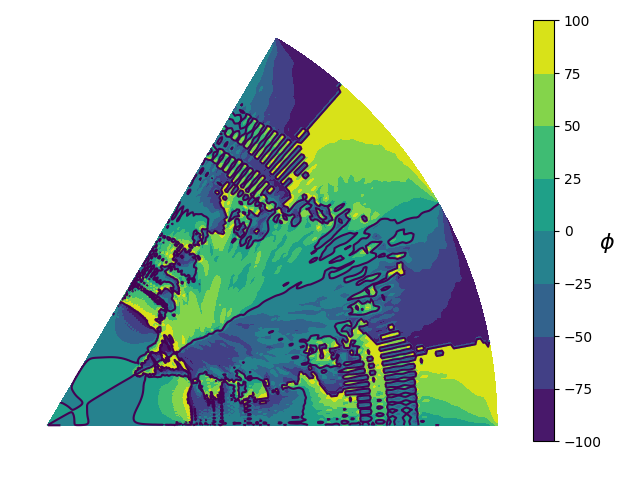

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
plt.figure()
cba = plt.contourf(coords[1,:,:,2], coords[1,:,:,1],np.arctan((uth/ur)[1,:,:])*180./np.pi)
plt.contour(coords[1,:,:,2], coords[1,:,:,1],np.arctan((uth/ur)[1,:,:])*180./np.pi,levels=[0])
clb = plt.colorbar(cba)
clb.set_label(r'$\phi$',rotation=0,fontsize=16)
#plt.annotate("(f)",xy=(0,35))
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()
#plt.savefig('figures_new/Re50k_t'+time+'_U.pdf')

## Wall Parameters

In [4]:
## Calculated using net resultant of wall shear stress components, See Schilicting
u_star = np.sqrt((mu/rho)[0,:,:]*np.sqrt(
          ((ur[1,:,:]-ur[0,:,:])/(z[1,:,:]-z[0,:,:]))**2 +
          ((uth[1,:,:]-uth[0,:,:])/(z[1,:,:]-z[0,:,:]))**2
         ))
Re_tau = u_star*(rho/mu)[0,:,:]
uplus = np.zeros((nxp,nyp,nzp)); yplus = np.zeros((nxp,nyp,nzp))
for i in range(nxp):
    uplus[i,:,:] = np.sqrt((ur[i])**2 + (uth[i])**2)/(u_star[:,:]+1e-10)
    yplus[i,:,:] = u_star[:,:]*z[i,:,:]*rho[i,:,:]/mu[i,:,:]

from scipy.integrate import simps as sps
delta = np.zeros((nyp,nzp)); 
delta_r = np.zeros((nyp,nzp)); delta_th = np.zeros((nyp,nzp)); 
delta_star = np.zeros((nyp,nzp))
u_delta = np.zeros(np.shape(delta)); rho_delta = np.zeros(np.shape(delta))

u_net = np.sqrt(ur**2 + uth**2)
for k in range(nzp):
    for j in range(nyp):
        for i in range(nxp):
            if abs(u_net[i,j,k]) >= abs(u_net[i+1,j,k]):
                index = i
                break
        if index == 0 or Re_tau[j,k] == 0:
            delta[j,k] = 0.
        else:
            delta[j,k] = z[index,j,k] 
            delta_star[j,k] = sps(1 - rho[:index,j,k]*u_net[:index,j,k]/(rho[index,j,k]*u_net[index,j,k]),x=z[:index,j,k])
            
            u_delta[j,k] = u_net[index,j,k]
            rho_delta[j,k] = rho[index,j,k]
            
### Radial delta
for k in range(nzp):
    for j in range(nyp):
        for i in range(nxp):
            if abs(ur[i,j,k]) >= abs(ur[i+1,j,k]):
                index = i
                break
        if index == 0 or Re_tau[j,k] == 0:
            delta_r[j,k] = 0.
        else:
            delta_r[j,k] = z[index,j,k]

### Azimuthal delta
for k in range(nzp):
    for j in range(nyp):
        for i in range(nxp):
            if abs(uth[i,j,k]) >= abs(uth[i+1,j,k]):
                index = i
                break
        if index == 0 or Re_tau[j,k] == 0:
            delta_th[j,k] = 0.
        else:
            delta_th[j,k] = z[index,j,k]
            
Re_tau_alt = u_star*rho[0,:,:]/mu[0,:,:]*delta

<IPython.core.display.Javascript object>


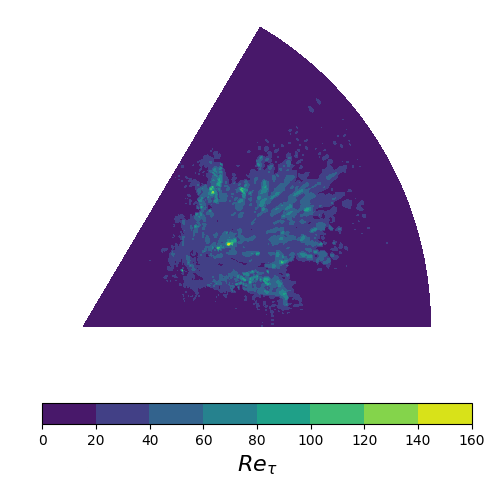

In [13]:
plt.figure(figsize=(5,5))
cba = plt.contourf(coords[0,:,:,2],coords[0,:,:,1],Re_tau_alt)
clb = plt.colorbar(cba,orientation='horizontal')
clb.set_label(r'$Re_{\tau}$',fontsize=16,rotation=0)
plt.axis('off')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Radial Growth Rate

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


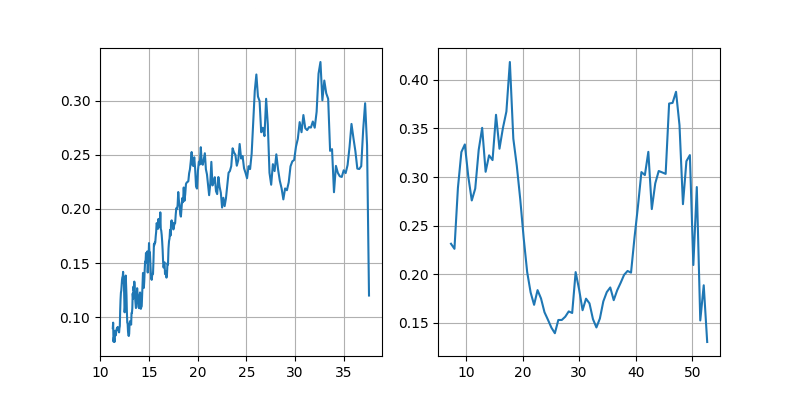

In [24]:
growth_r = np.zeros(np.shape(delta[:,0]))
growth_th = np.zeros(np.shape(delta[0,:]))

for j in range(nyp):
    count = 0.
    for k in range(nzp):
        if u_star[j,k] > 4e-3:
            count = count + 1
            growth_r[j] = growth_r[j] + delta[j,k]
    growth_r[j] = growth_r[j]/count

for k in range(nzp):
    count = 0.
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            count = count + 1
            growth_th[k] = growth_th[k] + delta[j,k]
    growth_th[k] = growth_th[k]/count

theta = np.arctan(coords[:,:,:,1]/coords[:,:,:,2])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(r[0,:,nzp/2], growth_r)
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(theta[1,1,:]*180./np.pi, growth_th)
plt.grid(True)

plt.show()

In [26]:
import csv
with open('data_new/t'+str(time)+'_growth_rate_r_delta.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nyp = '+str(nyp), 'growth_r'])
    for j in range(nyp):
        fp.writerow([str(r[0,j,nzp/2]), str(growth_r[j])])
with open('data_new/t'+str(time)+'_growth_rate_th_delta.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nyp = '+str(nyp), 'growth_th'])
    for k in range(nzp):
        fp.writerow([str(theta[1,1,k]), str(growth_th[k])])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


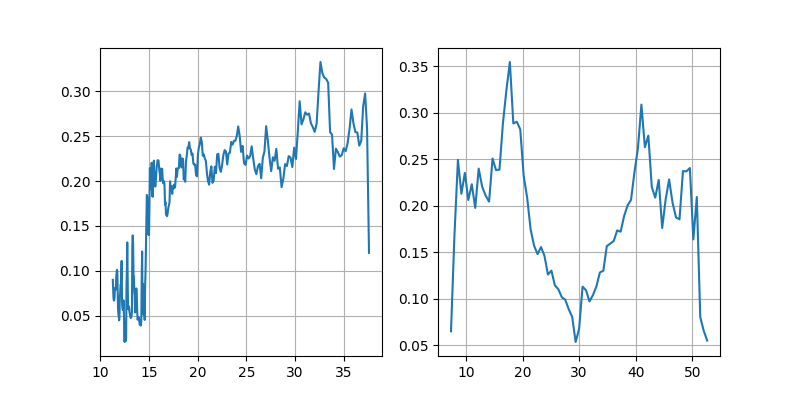

In [27]:
growth_r = np.zeros(np.shape(delta_r[:,0]))
growth_th = np.zeros(np.shape(delta_th[0,:]))

for j in range(nyp):
    count = 0.
    for k in range(nzp):
        if u_star[j,k] > 4e-3:
            count = count + 1
            growth_r[j] = growth_r[j] + delta_r[j,k]
    growth_r[j] = growth_r[j]/count

for k in range(nzp):
    count = 0.
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            count = count + 1
            growth_th[k] = growth_th[k] + delta_th[j,k]
    growth_th[k] = growth_th[k]/count

theta = np.arctan(coords[:,:,:,1]/coords[:,:,:,2])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(r[0,:,nzp/2], growth_r)
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(theta[1,1,:]*180./np.pi, growth_th)
plt.grid(True)

plt.show()

In [28]:
with open('data_new/t'+str(time)+'_growth_rate_r_delta_r.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nyp = '+str(nyp), 'growth_r'])
    for j in range(nyp):
        fp.writerow([str(r[0,j,nzp/2]), str(growth_r[j])])
with open('data_new/t'+str(time)+'_growth_rate_th_delta_th.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['nyp = '+str(nyp), 'growth_th'])
    for k in range(nzp):
        fp.writerow([str(theta[1,1,k]), str(growth_th[k])])

## Plus Profiles

9492


<IPython.core.display.Javascript object>


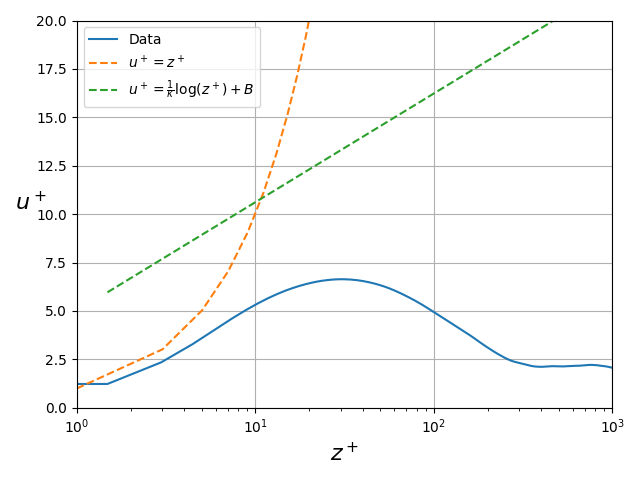

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [30]:
## Averaged over all positions!

uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            uavg[:] = uavg[:] + uplus[:,j,k]
            yavg[:] = yavg[:] + yplus[:,j,k]       
            count = count + 1
uavg = uavg/count; yavg = yavg/count
print count
kappa = 0.41; B = 5.0
plt.figure()
plt.semilogx(yavg[:],uavg[:],label='Data')
plt.semilogx(np.linspace(1,100),np.linspace(1,100),'--',label=r'$u^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'--',label=r'$u^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$u^+$',rotation=0,fontsize=16)
plt.xlim(1,1000)
plt.ylim(0,20)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
#plt.savefig('../figures/t'+str(time)+'_vrth+_r25th30_log.eps')
#plt.savefig('../figures/vrth+_Retaualt'+str(low)+'-'+str(upp)+'_log.eps')


## Save data
with open('data_new/t'+str(time)+'_vrth+_total.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['averaging points = '+str(count)])
    fp.writerow(['u+', 'y+'])
    for i in range(nxp):
        fp.writerow([str(uavg[i]), str(yavg[i])])

## $\tau_w$ prediction using wall-functions

In [5]:
## Musker (1979) model: mu_t = mu*C_o*kappa*z^+3/(kappa + C_o*z+^2), C_o = 9.6e-4
Co = 9.6e-4
kappa = 0.41
mut_ = mu*Co*kappa*yplus**3/(kappa + Co*yplus**2)
print np.shape(mut_), np.shape(u_star)
tauw_pred = np.zeros(np.shape(u_net))
for k in range(nzp):
    tauw_pred[1:-1,:,k] = np.array([(mu[1,:,k] + mut_[i,:,k])*(u_net[0,:,k] - u_net[i,:,k])/(z[0,:,k] - z[i,:,k]) for i in range(1,len(z[:,0,0])-1)])
    
## Mixing length model: mu_t = rho*l_m^2*dudz
## where l_m = kappa*z*(1 - exp(z+/A+))
lm_ = kappa*z*(1. - np.exp(-yplus/26))
print np.shape(lm_)
mutml_ = np.zeros(np.shape(u_net))
tauwml_ = np.zeros(np.shape(u_net))
for k in range(nzp):
    mutml_[1:-1,:,k] = np.array([rho[i,:,k]*lm_[i,:,k]**2*(u_net[0,:,k] - u_net[i,:,k])/(z[0,:,k] - z[i,:,k]) for i in range(1,len(z[:,0,0])-1)])
for k in range(nzp):
    tauwml_[1:-1,:,k] = np.array([(mu[i,:,k] + mutml_[i,:,k])*(u_net[0,:,k] - u_net[i,:,k])/(z[0,:,k] - z[i,:,k]) for i in range(1,len(z[:,0,0])-1)])
    
## Conventional log law prediction
tauwll_ = np.zeros(np.shape(u_net))
for k in range(nzp):
    for j in range(nyp):
        mindex = np.argmin(abs(yplus[:,j,k] - 10.))
        tauwll_[:mindex,j,k] = np.array([rho[0,j,k]*(u_net[:mindex,j,k]/yplus[:mindex,j,k])**2])
        tauwll_[mindex:,j,k] = np.array([rho[0,j,k]*(u_net[mindex:,j,k]/(1/0.41*np.log(yplus[mindex:,j,k]) + 5.0))**2])
        
tauw_ = 0.
meantauw_pred1_ = np.zeros(np.shape(z[:,0,0]))
meantauw_pred2_ = np.zeros(np.shape(z[:,0,0]))
meantauw_pred3_ = np.zeros(np.shape(z[:,0,0]))
count = 0.
yavg = np.zeros(np.shape(z[:,0,0]))
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 0.004:
            count = count + 1
            tauw_ = tauw_ + rho[0,j,k]*u_star[j,k]**2
            meantauw_pred1_[:] = meantauw_pred1_[:] + tauw_pred[:,j,k]
            meantauw_pred2_[:] = meantauw_pred2_[:] + tauwml_[:,j,k]
            meantauw_pred3_[:] = meantauw_pred3_[:] + tauwll_[:,j,k]
            yavg[:] = yavg[:] + yplus[:,j,k]
tauw_ = tauw_/count; meantauw_pred1_ = meantauw_pred1_/count; meantauw_pred2_ = meantauw_pred2_/count
yavg = yavg/count; meantauw_pred3_ = meantauw_pred3_/count

(422, 781, 98) (781, 98)
(422, 781, 98)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


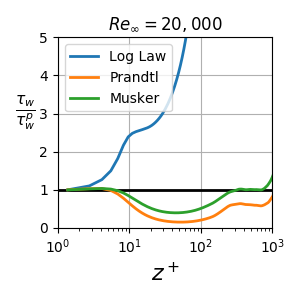

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


<IPython.core.display.Javascript object>


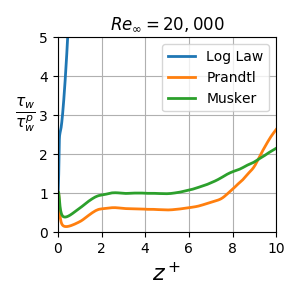

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in divide


In [9]:
plt.figure(figsize=(3,3))
plt.title(r"$Re_\infty = 20,000$")
plt.semilogx(yavg[:], np.ones(np.shape(z[:,0,0])),'k',linewidth=2)
#plt.semilogx(yavg[1:], tauw_*np.ones(np.shape(z[1:,0,0])),'k',linewidth=2)
plt.semilogx(yavg[1:],tauw_/meantauw_pred3_[1:],linewidth=2,label="Log Law")
plt.semilogx(yavg[1:],tauw_/meantauw_pred2_[1:],linewidth=2, label="Prandtl")
plt.semilogx(yavg[1:],tauw_/meantauw_pred1_[1:],linewidth=2,label="Musker")
plt.grid(True)
plt.xlim(1,1000)
plt.ylim(0,5)
plt.xlabel(r"$z^+$",fontsize=16)
plt.ylabel(r"$\frac{\tau_w}{\tau_w^p}$",rotation=0,fontsize=16,labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig("figures_new/Re20k_t240-400_wsspred.pdf")
plt.show()

plt.figure(figsize=(3,3))
plt.title(r"$Re_\infty = 20,000$")
#plt.semilogx(yavg[1:], tauw_*np.ones(np.shape(z[1:,0,0])),'k',linewidth=2)
plt.plot(z[1:,0,0],tauw_/meantauw_pred3_[1:],linewidth=2,label="Log Law")
plt.plot(z[1:,0,0],tauw_/meantauw_pred2_[1:],linewidth=2, label="Prandtl")
plt.plot(z[1:,0,0],tauw_/meantauw_pred1_[1:],linewidth=2,label="Musker")
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,5)
plt.xlabel(r"$z^+$",fontsize=16)
plt.ylabel(r"$\frac{\tau_w}{\tau_w^p}$",rotation=0,fontsize=16,labelpad=10)
plt.legend()
plt.tight_layout()
plt.show()

## Defect Plotting

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


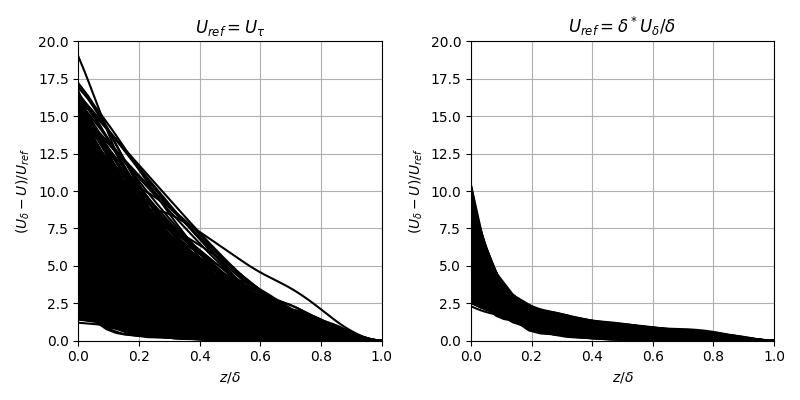

In [11]:
## Law U_delta - U = u_tau*F(y/\delta)
Ud_m_Unet_by_utau = np.zeros(np.shape(uz))
for i in range(nxp):
    Ud_m_Unet_by_utau[i] = (u_delta - u_net[i])/u_star
    
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title(r"$U_{ref} = U_\tau$")
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            plt.plot(z[:,j,k]/delta[j,k], Ud_m_Unet_by_utau[:,j,k],'k')
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,20)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$(U_\delta - U)/U_{ref}$')
plt.subplot(1,2,2)
plt.title(r"$U_{ref} = \delta^* U_\delta /\delta$")
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            plt.plot(z[:,j,k]/delta[j,k], Ud_m_Unet_by_utau[:,j,k]*u_star[j,k]*delta[j,k]/(delta_star[j,k]*u_delta[j,k]),'k')
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,20)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$(U_\delta - U)/U_{ref}$')
plt.tight_layout()
plt.show()
#plt.savefig("figures_new/velocity_defect.pdf")

<IPython.core.display.Javascript object>


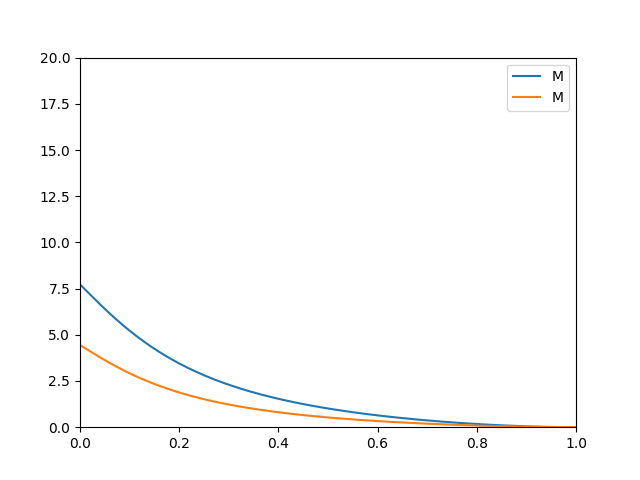

In [16]:
from scipy.interpolate import interp1d

#defect = Ud_m_Unet_by_utau
#print np.shape(defect)
nintv = 1000; count = 0
defect = np.zeros(nintv); defectn = np.zeros(nintv)
mean_defect = np.zeros(np.shape(z[:,0,0]))
for k in range(nzp):
    for j in range(nyp):
        if u_star[j,k] > 4e-3:
            func = interp1d(z[:,j,k]/delta[j,k], Ud_m_Unet_by_utau[:,j,k])
            znew = np.linspace(0,1,nintv)
            defect = defect + func(znew)
            count = count + 1
            
            func = interp1d(z[:,j,k]/delta[j,k], Ud_m_Unet_by_utau[:,j,k]*u_star[j,k]*delta[j,k]/(delta_star[j,k]*u_delta[j,k]))
            defectn = defectn + func(znew)
            
plt.figure()
plt.plot(znew,defect/count,label="M")
plt.plot(znew,defectn/count,label="M")
plt.xlim(0,1)
plt.ylim(0,20)
plt.legend(loc='best')
plt.show()

In [18]:
with open('data_new/velocity_defect_mean.csv','w') as cf:
    fp = csv.writer(cf)
    fp.writerow(['z/delta', 'defect/utau', 'defect/newscale'])
    for i in range(nintv):
        fp.writerow([str(znew[i]), str(defect[i]/count), str(defectn[i]/count)])

## Temporal Variation of wall-scaled parameters

<IPython.core.display.Javascript object>


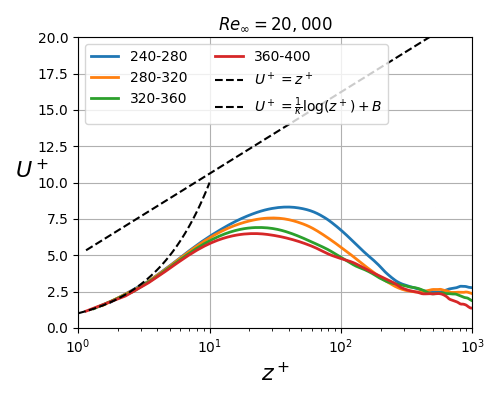

8220
9227
9477
9327


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: divide by zero encountered in log


In [5]:
%matplotlib notebook
times = ["250-280", "280-320", "320-360", "360-400"]
labels = ["240-280", "280-320", "320-360", "360-400"]

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/"]

plt.figure(figsize=(5,4))
plt.title(r"$Re_\infty = 20,000$")
for tt in range(len(times)):
    for ii in range(len(wdir)):
        f = open(wdir[ii]+"STAT_cont_m48_t"+times[tt]+".bin","rb")

        ### Reading the header of the STAT File
        val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
        #print val, prec, ib, nb
        nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
        #print nxp, nyp, nzp, ngp

        for i in range(1,ngp+1):
            gid, nvar = np.fromfile(f,dtype='int32',count=2)
            #print gid, nvar
        nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
        tinterval = np.fromfile(f,dtype='float32',count=1)
        #print nsamps, tstart, tend, tinterval

        ### Reading in the data now
        coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
        rho = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        uz = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        ur = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        skipindex = 2
        f.seek(skipindex*nxp*nyp*nzp*4,1)
        mu = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        skipindex = 9
        f.seek(skipindex*nxp*nyp*nzp*4,1)
        uth = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        f.close()

    ### Getting ready to plot this Shizz!
    u = np.sqrt((uz)**2 + (ur)**2 + (uth)**2)
    r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
    z = coords[:,:,:,0]
    
    ## Calculated using net resultant of wall shear stress components, See Schilicting
    u_star = np.sqrt((mu/rho)[0,:,:]*np.sqrt(
              ((ur[1,:,:]-ur[0,:,:])/(z[1,:,:]-z[0,:,:]))**2 +
              ((uth[1,:,:]-uth[0,:,:])/(z[1,:,:]-z[0,:,:]))**2
             ))
    Re_tau = u_star*(rho/mu)[0,:,:]
    uplus = np.zeros((nxp,nyp,nzp)); yplus = np.zeros((nxp,nyp,nzp))
    for i in range(nxp):
        uplus[i,:,:] = np.sqrt((ur[i])**2 + (uth[i])**2)/(u_star[:,:]+1e-10)
        yplus[i,:,:] = u_star[:,:]*z[i,:,:]*rho[i,:,:]/mu[i,:,:]

    from scipy.integrate import simps as sps
    delta = np.zeros((nyp,nzp)); 
    delta_r = np.zeros((nyp,nzp)); delta_th = np.zeros((nyp,nzp)); 
    delta_star = np.zeros((nyp,nzp))
    u_delta = np.zeros(np.shape(delta)); rho_delta = np.zeros(np.shape(delta))

    u_net = np.sqrt(ur**2 + uth**2)
    for k in range(nzp):
        for j in range(nyp):
            for i in range(nxp):
                if abs(u_net[i,j,k]) >= abs(u_net[i+1,j,k]):
                    index = i
                    break
            if index == 0 or Re_tau[j,k] == 0:
                delta[j,k] = 0.
            else:
                delta[j,k] = z[index,j,k] 
                delta_star[j,k] = sps(1 - rho[:index,j,k]*u_net[:index,j,k]/(rho[index,j,k]*u_net[index,j,k]),x=z[:index,j,k])

                u_delta[j,k] = u_net[index,j,k]
                rho_delta[j,k] = rho[index,j,k]

    Re_tau_alt = u_star*rho[0,:,:]/mu[0,:,:]*delta
    
    uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
    for k in range(nzp):
        for j in range(nyp):
            if u_star[j,k] > 4e-3:
                uavg[:] = uavg[:] + uplus[:,j,k]
                yavg[:] = yavg[:] + yplus[:,j,k]       
                count = count + 1
    uavg = uavg/count; yavg = yavg/count
    print count
    kappa = 0.41; B = 5.0
    plt.semilogx(yavg[1:],uavg[1:],linewidth=2,label=labels[tt])
    
    ### Dump the data for later processing
    with open('data_new/t'+str(labels[tt])+'_vrth+_total.csv','w') as cf:
        fp = csv.writer(cf)
        fp.writerow(['averaging points = '+str(count)])
        fp.writerow(['u+', 'y+'])
        for i in range(nxp):
            fp.writerow([str(uavg[i]), str(yavg[i])])

plt.semilogx(np.linspace(1,10),np.linspace(1,10),'k--',label=r'$U^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'k--',label=r'$U^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$U^+$',rotation=0,fontsize=16)
plt.xlim(1,1000)
plt.ylim(0,20)
plt.legend(loc=2,ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures_new/Re20k_vrth+_overtime.pdf")

## Temporal Variation over a fixed point in space

<IPython.core.display.Javascript object>


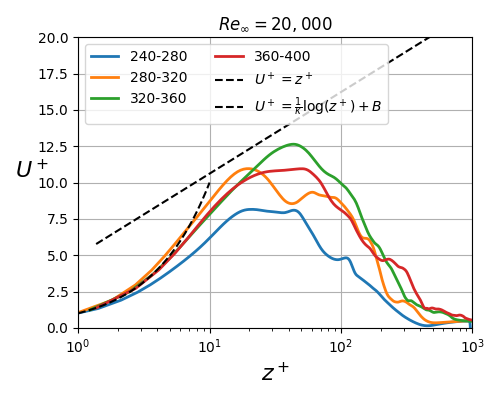

81
81
81
81


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in log


In [6]:
%matplotlib notebook
times = ["250-280", "280-320", "320-360", "360-400"]
labels = ["240-280", "280-320", "320-360", "360-400"]

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/"]

plt.figure(figsize=(5,4))
plt.title(r"$Re_\infty = 20,000$")
for tt in range(len(times)):
    for ii in range(len(wdir)):
        f = open(wdir[ii]+"STAT_cont_m48_t"+times[tt]+".bin","rb")

        ### Reading the header of the STAT File
        val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
        #print val, prec, ib, nb
        nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
        #print nxp, nyp, nzp, ngp

        for i in range(1,ngp+1):
            gid, nvar = np.fromfile(f,dtype='int32',count=2)
            #print gid, nvar
        nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
        tinterval = np.fromfile(f,dtype='float32',count=1)
        #print nsamps, tstart, tend, tinterval

        ### Reading in the data now
        coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
        rho = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        uz = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        ur = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        skipindex = 2
        f.seek(skipindex*nxp*nyp*nzp*4,1)
        mu = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        skipindex = 9
        f.seek(skipindex*nxp*nyp*nzp*4,1)
        uth = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        f.close()

    ### Getting ready to plot this Shizz!
    u = np.sqrt((uz)**2 + (ur)**2 + (uth)**2)
    r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
    z = coords[:,:,:,0]
    
    ## Calculated using net resultant of wall shear stress components, See Schilicting
    u_star = np.sqrt((mu/rho)[0,:,:]*np.sqrt(
              ((ur[1,:,:]-ur[0,:,:])/(z[1,:,:]-z[0,:,:]))**2 +
              ((uth[1,:,:]-uth[0,:,:])/(z[1,:,:]-z[0,:,:]))**2
             ))
    
    Re_tau = u_star*(rho/mu)[0,:,:]
    uplus = np.zeros((nxp,nyp,nzp)); yplus = np.zeros((nxp,nyp,nzp))
    for i in range(nxp):
        uplus[i,:,:] = np.sqrt((ur[i])**2 + (uth[i])**2)/(u_star[:,:]+1e-10)
        yplus[i,:,:] = u_star[:,:]*z[i,:,:]*rho[i,:,:]/mu[i,:,:]

    from scipy.integrate import simps as sps
    delta = np.zeros((nyp,nzp)); 
    delta_r = np.zeros((nyp,nzp)); delta_th = np.zeros((nyp,nzp)); 
    delta_star = np.zeros((nyp,nzp))
    u_delta = np.zeros(np.shape(delta)); rho_delta = np.zeros(np.shape(delta))

    u_net = np.sqrt(ur**2 + uth**2)
    for k in range(nzp):
        for j in range(nyp):
            for i in range(nxp):
                if abs(u_net[i,j,k]) >= abs(u_net[i+1,j,k]):
                    index = i
                    break
            if index == 0 or Re_tau[j,k] == 0:
                delta[j,k] = 0.
            else:
                delta[j,k] = z[index,j,k] 
                delta_star[j,k] = sps(1 - rho[:index,j,k]*u_net[:index,j,k]/(rho[index,j,k]*u_net[index,j,k]),x=z[:index,j,k])

                u_delta[j,k] = u_net[index,j,k]
                rho_delta[j,k] = rho[index,j,k]

    Re_tau_alt = u_star*rho[0,:,:]/mu[0,:,:]*delta
    
    uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
    
    pos = 35.
    rgrid = np.loadtxt("r_grid_1.dat",skiprows=1)
    yind = np.argmin(abs(rgrid-pos))
    for k in range(nzp/2-4,nzp/2+5):
        for j in range(yind-4,yind+5):
            uavg[:] = uavg[:] + uplus[:,j,k]
            yavg[:] = yavg[:] + yplus[:,j,k]       
            count = count + 1
    uavg = uavg/count; yavg = yavg/count
    print count
    kappa = 0.41; B = 5.0
    plt.semilogx(yavg[1:],uavg[1:],linewidth=2,label=labels[tt])
    
    ### Dump the data for later processing
    with open('data_new/t'+str(labels[tt])+'_vrth+_r'+str(int(pos))+'th30.csv','w') as cf:
        fp = csv.writer(cf)
        fp.writerow(['averaging points = '+str(count)])
        fp.writerow(['u+', 'y+'])
        for i in range(nxp):
            fp.writerow([str(uavg[i]), str(yavg[i])])

plt.semilogx(np.linspace(1,10),np.linspace(1,10),'k--',label=r'$U^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'k--',label=r'$U^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$U^+$',rotation=0,fontsize=16)
plt.xlim(1,1000)
plt.ylim(0,20)
plt.legend(loc=2,ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures_new/Re20k_vrth+_r"+str(int(pos))+"th30.pdf")

## Temporal Variation over $Re_\tau$ ranges

<IPython.core.display.Javascript object>


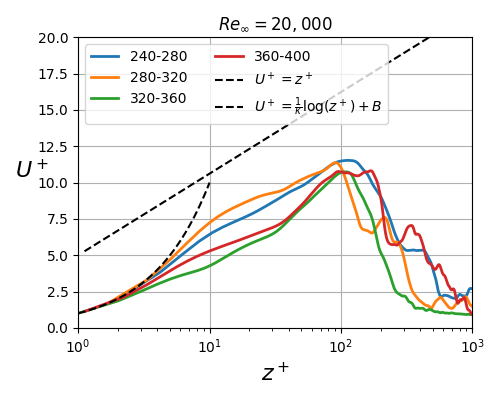

143.14002700295168
23
110.1310608978747
3
117.74383122472045
5
122.05842343510085
8


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log


In [19]:
%matplotlib notebook
times = ["250-280", "280-320", "320-360", "360-400"]
labels = ["240-280", "280-320", "320-360", "360-400"]

wdir = ["/storage/clav/Postdoc/ph.m48.pulsed.Re20k/post_pro/"]

plt.figure(figsize=(5,4))
plt.title(r"$Re_\infty = 20,000$")
for tt in range(len(times)):
    for ii in range(len(wdir)):
        f = open(wdir[ii]+"STAT_cont_m48_t"+times[tt]+".bin","rb")

        ### Reading the header of the STAT File
        val,prec,ib,nb = np.fromfile(f,dtype='int32',count=4)
        #print val, prec, ib, nb
        nxp, nyp, nzp, ngp = np.fromfile(f,dtype='int32',count=4)
        #print nxp, nyp, nzp, ngp

        for i in range(1,ngp+1):
            gid, nvar = np.fromfile(f,dtype='int32',count=2)
            #print gid, nvar
        nsamps, tstart, tend = np.fromfile(f,dtype='int32',count=3)
        tinterval = np.fromfile(f,dtype='float32',count=1)
        #print nsamps, tstart, tend, tinterval

        ### Reading in the data now
        coords = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp*3),(nxp,nyp,nzp,3),order='F')
        rho = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        uz = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        ur = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        skipindex = 2
        f.seek(skipindex*nxp*nyp*nzp*4,1)
        mu = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        skipindex = 9
        f.seek(skipindex*nxp*nyp*nzp*4,1)
        uth = np.reshape(np.fromfile(f,dtype="float32",count=nxp*nyp*nzp),(nxp,nyp,nzp),order='F')
        f.close()

    ### Getting ready to plot this Shizz!
    u = np.sqrt((uz)**2 + (ur)**2 + (uth)**2)
    r = np.sqrt(coords[:,:,:,1]**2 + coords[:,:,:,2]**2)
    z = coords[:,:,:,0]
    
    ## Calculated using net resultant of wall shear stress components, See Schilicting
    u_star = np.sqrt((mu/rho)[0,:,:]*np.sqrt(
              ((ur[1,:,:]-ur[0,:,:])/(z[1,:,:]-z[0,:,:]))**2 +
              ((uth[1,:,:]-uth[0,:,:])/(z[1,:,:]-z[0,:,:]))**2
             ))
    
    Re_tau = u_star*(rho/mu)[0,:,:]
    uplus = np.zeros((nxp,nyp,nzp)); yplus = np.zeros((nxp,nyp,nzp))
    for i in range(nxp):
        uplus[i,:,:] = np.sqrt((ur[i])**2 + (uth[i])**2)/(u_star[:,:]+1e-10)
        yplus[i,:,:] = u_star[:,:]*z[i,:,:]*rho[i,:,:]/mu[i,:,:]

    from scipy.integrate import simps as sps
    delta = np.zeros((nyp,nzp)); 
    delta_r = np.zeros((nyp,nzp)); delta_th = np.zeros((nyp,nzp)); 
    delta_star = np.zeros((nyp,nzp))
    u_delta = np.zeros(np.shape(delta)); rho_delta = np.zeros(np.shape(delta))

    u_net = np.sqrt(ur**2 + uth**2)
    for k in range(nzp):
        for j in range(nyp):
            for i in range(nxp):
                if abs(u_net[i,j,k]) >= abs(u_net[i+1,j,k]):
                    index = i
                    break
            if index == 0 or Re_tau[j,k] == 0:
                delta[j,k] = 0.
            else:
                delta[j,k] = z[index,j,k] 
                delta_star[j,k] = sps(1 - rho[:index,j,k]*u_net[:index,j,k]/(rho[index,j,k]*u_net[index,j,k]),x=z[:index,j,k])

                u_delta[j,k] = u_net[index,j,k]
                rho_delta[j,k] = rho[index,j,k]

    Re_tau_alt = u_star*rho[0,:,:]/mu[0,:,:]*delta
    
    print np.max(Re_tau_alt)
    
    uavg = np.zeros((nxp)); yavg = np.zeros((nxp)); count = 0
    
    low = 100
    upp = low + 50
    for k in range(nzp):
        for j in range(nyp):
            if Re_tau_alt[j,k] > low and Re_tau_alt[j,k] <= upp:
                uavg[:] = uavg[:] + uplus[:,j,k]
                yavg[:] = yavg[:] + yplus[:,j,k]       
                count = count + 1
    uavg = uavg/count; yavg = yavg/count
    print count
    kappa = 0.41; B = 5.0
    plt.semilogx(yavg[1:],uavg[1:],linewidth=2,label=labels[tt])
    
    ### Dump the data for later processing
    with open('data_new/t'+str(labels[tt])+'_vrth+_Retau'+str(low)+'-'+str(upp)+'.csv','w') as cf:
        fp = csv.writer(cf)
        fp.writerow(['averaging points = '+str(count)])
        fp.writerow(['u+', 'y+'])
        for i in range(nxp):
            fp.writerow([str(uavg[i]), str(yavg[i])])

plt.semilogx(np.linspace(1,10),np.linspace(1,10),'k--',label=r'$U^+=z^+$')
plt.semilogx(yavg[:], 1/kappa*np.log(yavg[:]) + B
         ,'k--',label=r'$U^+=\frac{1}{\kappa} \log(z^+) + B$')
plt.xlabel(r'$z^+$',fontsize=16)
plt.ylabel(r'$U^+$',rotation=0,fontsize=16)
plt.xlim(1,1000)
plt.ylim(0,20)
plt.legend(loc=2,ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures_new/Re20k_vrth+_Retau"+str(low)+"-"+str(upp)+".pdf")